In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation

from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score

In [2]:
## Boston Marathon data for 2014

bm2014 = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv')

In [3]:
bm2014.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [4]:
bm2014.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [5]:
len(bm2014)

31984

In [6]:
bm2014.describe()

,division,age,official,genderdiv,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658
std,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000
25%,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000
50%,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000
75%,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000
max,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000


In [7]:
bm2014.describe(include='object')

,10k,name,25k,gender,bib,ctz,35k,state,30k,5k,half,20k,country,city,40k
count,31984,31984,31984,31984,31984,1244,31984,29408,31984,31984,31984,31984,31984,31983,31984
unique,2766,31915,6570,2,31984,84,9516,68,8090,1491,5651,5375,78,5934,10546
top,-,"Johnson, Patrick",-,M,4007,GBR,-,MA,-,23.93,-,-,USA,Boston,-
freq,50,2,216,17617,1,171,34,7587,40,81,72,51,27233,1034,39


In [8]:
bm2014.iloc[:5, :11]

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83


In [9]:
bm2014.iloc[:5, 11:]

,overall,pace,state,30k,5k,half,20k,country,city,40k
0,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


## Try clustering into Male / Female

In [10]:
bm2014_num = bm2014.copy()
bm2014_num.drop(['name', 'division', 'bib', 'genderdiv', 
                'ctz', 'state', 'country', 'city'], axis=1, inplace=True)
bm2014_num.head()

,10k,25k,gender,age,official,35k,overall,pace,30k,5k,half,20k,40k
0,17.37,47.67,M,47,85.25,71.40,8,3.27,59.18,8.02,39.72,37.65,80.43
1,32.58,82.43,F,33,138.95,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10
2,16.62,45.80,M,41,80.60,67.42,1,3.08,56.45,7.75,38.03,36.10,76.10
3,32.57,82.43,F,24,140.58,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95
4,17.12,46.37,M,40,81.23,67.83,2,3.10,57.03,8.02,38.60,36.58,76.72


In [11]:
def find_dash(df):
    for col in df.columns:
        this_set = set(df[col])
        if ('-' in this_set):
            return col

In [12]:
find_dash(bm2014_num)

'10k'

In [13]:
bm2014_num.replace('-', np.nan, inplace=True)
## There are actually loads of dashes. See if okay just to drop rows

In [14]:
bm2014_num_nonan = bm2014_num.dropna()

In [15]:
bm2014_num_nonan.shape

(31649, 13)

In [16]:
bm2014_num.shape

(31984, 13)

In [17]:
## Drop NAs.

bm2014_num.dropna(inplace=True)
bm2014_num.reset_index(inplace=True, drop=True)

In [18]:
## Separate outcome
y = bm2014_num['gender']
x = bm2014_num.drop(['gender'], axis=1)

In [19]:
y = y.to_frame()

In [20]:
y['gender'].unique()

array(['M', 'F'], dtype=object)

In [21]:
y['gender'] = np.where(y['gender'] == 'M', 1, 0)

In [22]:
xnorm = normalize(x)

In [23]:
pca = PCA(n_components=10)
xpca = pca.fit_transform(xnorm)

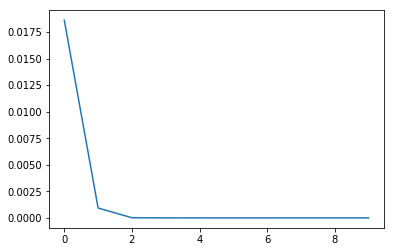

In [24]:
plt.plot(pca.explained_variance_)
plt.show()

In [25]:
pca = PCA(n_components = 2)
xpca = pca.fit_transform(xnorm)

In [26]:
## Split data into four so can check for consistency
## Split PCA into corresponding splits so can plot visualizations

xhalf1, xhalf2, xpcahalf1, xpcahalf2, yhalf1, yhalf2 = train_test_split(xnorm, xpca, y,
                                                 test_size=0.5,
                                                 random_state=55)
x1, x2, xpca1, xpca2, y1, y2 = train_test_split(xhalf1, xpcahalf1, yhalf1,
                                 test_size=0.5, 
                                 random_state=55)
x3, x4, xpca3, xpca4, y3, y4 = train_test_split(xhalf2, xpcahalf2, yhalf2,
                                 test_size=0.5, 
                                 random_state=55)


In [27]:
print(len(x1), len(x2), len(x3), len(x4))

7912 7912 7912 7913


In [28]:
x4 = x4[:-1]
xpca4 = xpca4[:-1]
y4 = y4[:-1]

### KMeans

In [29]:
ypred = pd.DataFrame()

for counter, data in enumerate([
    (x1, xpca1),
    (x2, xpca2),
    (x3, xpca3),
    (x4, xpca4)
]):
    ypred['pca_1_sample_' + str(counter)] = data[1][:, 0]
    ypred['pca_2_sample_' + str(counter)] = data[1][:, 1]
    
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=55).fit_predict(data[0])
        ypred['clust_' + str(nclust) + '_sample_' + str(counter)] = pred

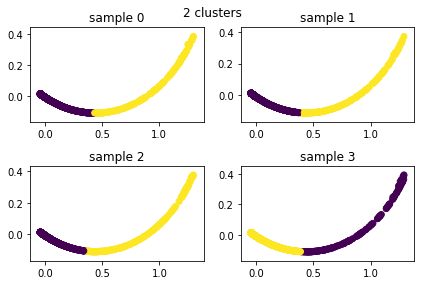

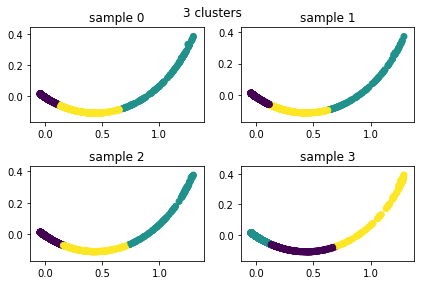

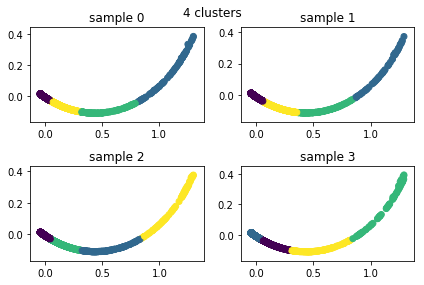

In [30]:
for cluster in range(2, 5):
    f, axarr = plt.subplots(2, 2)
    for i in range(4):
        x_sub = ypred['pca_1_sample_{}'.format(i)]
        y_sub = ypred['pca_2_sample_{}'.format(i)]
        c = ypred['clust_{}_sample_{}'.format(cluster, i)]
        
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
       # axarr[rows, cols].set_ylim([-.2, .2])
       # axarr[rows, cols].set_xlim([-.1, 1.5])
        
    plt.suptitle('{} clusters'.format(cluster))
    plt.tight_layout()
    plt.show()

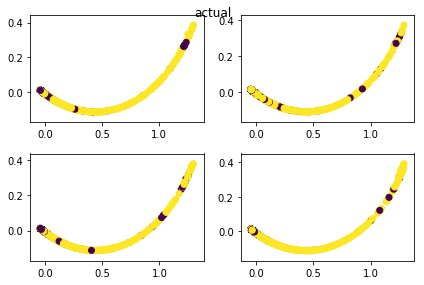

In [54]:
ys = pd.DataFrame()
ys['y0'] = y1['gender'].values
ys['y1'] = y2['gender'].values
ys['y2'] = y3['gender'].values
ys['y3'] = y4['gender'].values

f, axarr = plt.subplots(2, 2)
for i in range(4):
    x_sub = ypred['pca_1_sample_{}'.format(i)]
    y_sub = ypred['pca_2_sample_{}'.format(i)]
    c = ys['y{}'.format(i)]

    rows = int(np.floor(i / 2))
    cols = i % 2
    axarr[rows, cols].scatter(x_sub, y_sub, c=c)
   # axarr[rows, cols].set_ylim([-.2, .2])
   # axarr[rows, cols].set_xlim([-.1, 1.5])

plt.suptitle('actual')
plt.tight_layout()
plt.show()

In [40]:
ypred.head()

,pca_1_sample_0,pca_2_sample_0,clust_2_sample_0,clust_3_sample_0,clust_4_sample_0,pca_1_sample_1,pca_2_sample_1,clust_2_sample_1,clust_3_sample_1,clust_4_sample_1,pca_1_sample_2,pca_2_sample_2,clust_2_sample_2,clust_3_sample_2,clust_4_sample_2,pca_1_sample_3,pca_2_sample_3,clust_2_sample_3,clust_3_sample_3,clust_4_sample_3
0,0.004581,-0.013080,0,0,0,-0.032124,0.005460,0,0,0,-0.043292,0.011472,0,0,0,-0.042883,0.011244,1,1,1
1,0.024302,-0.022248,0,0,0,-0.035868,0.007453,0,0,0,-0.041547,0.010480,0,0,0,-0.032663,0.005761,1,1,1
2,-0.037931,0.008581,0,0,0,0.029068,-0.024499,0,0,0,-0.003213,-0.009335,0,0,0,-0.037603,0.008405,1,1,1
3,0.089759,-0.049561,0,0,3,0.004142,-0.012901,0,0,0,-0.043487,0.011576,0,0,0,-0.043436,0.011512,1,1,1
4,-0.040016,0.009651,0,0,0,-0.028063,0.003262,0,0,0,-0.043252,0.011467,0,0,0,-0.028632,0.003583,1,1,1


In [48]:
ypred_sample0 = ypred.iloc[:, :5]
ypred_sample0['sample'] = 0
ypred_sample0['actual'] = y1['gender'].values
ypred_sample1 = ypred.iloc[:, 5:10]
ypred_sample1['sample'] = 1
ypred_sample1['actual'] = y2['gender'].values
ypred_sample2 = ypred.iloc[:, 10:15]
ypred_sample2['sample'] = 2
ypred_sample2['actual'] = y3['gender'].values
ypred_sample3 = ypred.iloc[:, 15:]
ypred_sample3['sample'] = 3
ypred_sample3['actual'] = y4['gender'].values

cols = ['pca1', 'pca2', 'clust2', 'clust3', 'clust4', 'sample', 'actual']

ypred_sample0.columns = cols
ypred_sample1.columns = cols
ypred_sample2.columns = cols
ypred_sample3.columns = cols

ypred_long = pd.concat([ypred_sample0, 
                        ypred_sample1, 
                        ypred_sample2, 
                        ypred_sample3],
                        axis=0)

ypred_long.reset_index(inplace=True, drop=True)
ypred_long

,pca1,pca2,clust2,clust3,clust4,sample,actual
0,0.004581,-0.013080,0,0,0,0,1
1,0.024302,-0.022248,0,0,0,0,0
2,-0.037931,0.008581,0,0,0,0,1
3,0.089759,-0.049561,0,0,3,0,1
4,-0.040016,0.009651,0,0,0,0,1
5,-0.014984,-0.003501,0,0,0,0,0
6,-0.043337,0.011504,0,0,0,0,0
7,-0.039259,0.009269,0,0,0,0,1
8,-0.036123,0.007574,0,0,0,0,0
9,0.001774,-0.011860,0,0,0,0,0


In [49]:
pd.crosstab(ypred_long['clust2'], ypred_long['actual'])

actual,0,1
clust2,,
0,10658,12709
1,3506,4775


In [50]:
pd.crosstab(ypred_long['clust3'], ypred_long['actual'])

actual,0,1
clust3,,
0,10610,12199
1,3490,4288
2,64,997


In [51]:
pd.crosstab(ypred_long['clust4'], ypred_long['actual'])

actual,0,1
clust4,,
0,10571,11628
1,3454,3908
2,47,755
3,92,1193


In [53]:
adjusted_rand_score(ypred_long['clust2'], ypred_long['actual'])

-0.0019190168330759701

In [81]:
for sample in [x1, x2, x3, x4]:
    model = KMeans(n_clusters=2, random_state=55).fit(sample)
    labels = model.labels_
    print(silhouette_score(sample, labels, metric='euclidean'))

0.9365423056442069
0.9314753229408644
0.9285394198190023
0.9304300739489558


### Simplify - just look at whole dataset

In [56]:
x.head()

,10k,25k,age,official,35k,overall,pace,30k,5k,half,20k,40k
0,17.37,47.67,47,85.25,71.40,8,3.27,59.18,8.02,39.72,37.65,80.43
1,32.58,82.43,33,138.95,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10
2,16.62,45.80,41,80.60,67.42,1,3.08,56.45,7.75,38.03,36.10,76.10
3,32.57,82.43,24,140.58,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95
4,17.12,46.37,40,81.23,67.83,2,3.10,57.03,8.02,38.60,36.58,76.72


In [57]:
y.head()

,gender
0,1
1,0
2,1
3,0
4,1


In [64]:
all_x_pred = KMeans(n_clusters = 2).fit_predict(xnorm)
pd.crosstab(all_x_pred, y['gender'])

gender,0,1
row_0,,
0,14117,16829
1,48,655


In [65]:
pca_all = PCA(n_components=2)
xpca_all = pca_all.fit_transform(xnorm)

In [70]:
pca_all.explained_variance_

array([0.01861066, 0.00093118])

In [79]:
xpca_all[:, 0]

array([ 1.26859376,  1.26406873,  1.29227178, ..., -0.04320061,
       -0.0435512 , -0.03522684])

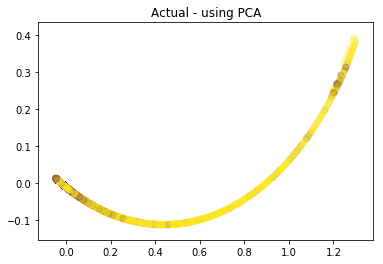

In [83]:
plt.scatter(xpca_all[:, 0], xpca_all[:, 1], c=y['gender'], alpha=.2)
plt.title('Actual - using PCA')
plt.show()

## Try grouping ages then predicting them

In [86]:
bm2014.age.describe()

count    31984.000000
mean        42.407079
std         11.316496
min         18.000000
25%         33.000000
50%         42.000000
75%         50.000000
max         81.000000
Name: age, dtype: float64

In [111]:
bm2014['age_group'] = np.nan

for row in np.arange(0, len(bm2014)):
    if (bm2014.iloc[row, 'age_group'].isnull()):
        if (bm2014.iloc[row, 'age'] < 21):
            bm2014['age_group'] = 'under_21'
            elif (bm2014.iloc[row, 'age'] < 31):
                bm2014['age_group'] = '21_to_30'
                elif (bm2014.iloc[row, 'age'] < 41):
                    bm2014.iloc[row, 'age_group'] = '31_to_40'

#bm2014['age_group'] = np.where(bm2014['age'] < 21, 'under_21', bm2014['age_group'])
#bm2014['age_group'] = np.where((bm2014['age'] < 31) & (np.isnan(bm2014['age_group'])), '21_to_30', bm2014['age_group'])
#bm2014['age_group'] = np.where((bm2014['age'] < 41) & (np.isnan(bm2014['age_group'])), '31_to_40', bm2014['age_group'])
#bm2014['age_group'] = np.where((bm2014['age'] < 51) & (np.isnan(bm2014['age_group'])), '41_to_50', bm2014['age_group'])
#bm2014['age_group'] = np.where((bm2014['age'] < 61) & (np.isnan(bm2014['age_group'])), '51_to_60', bm2014['age_group'])
#bm2014['age_group'] = np.where((bm2014['age'] > 60) & (np.isnan(bm2014['age_group'])), 'over_60', bm2014['age_group'])